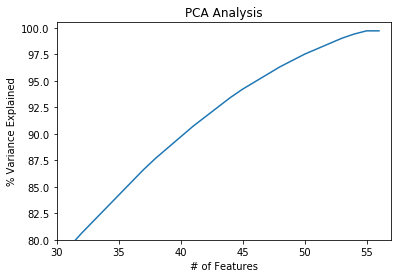

In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest


def read_data():
    data = pd.read_csv("dataset.txt", delimiter=',')
    features = data.iloc[:, :57].values
    target = data.iloc[:, 57:].values
    # normalize the data
    features = StandardScaler().fit_transform(features)
    return features, target

features, target = read_data()

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.5)

pca = PCA(n_components=57, svd_solver='full')
pca.fit(x_train)
variance = pca.explained_variance_ratio_ 
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var

plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(80,100.5)
plt.xlim(30, 57)
plt.style.context('seaborn-whitegrid')


plt.plot(var) 

# PCA Analysis
As you can see here in the PCA Analysis plot, it can be shown that proportion of variance starts to become 80% after 31 examples and converges to 100% at 53 examples. Which means that there is no reason to use more than 53 examples for this example.

In [9]:
print("Case 1")
classifier = KNeighborsClassifier(n_jobs=-1,n_neighbors=5,weights='uniform')  
classifier.fit(x_train, y_train.ravel()) 
y_pred = classifier.predict(x_test)  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

Case 1
[[1305   98]
 [ 143  754]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.92      1403
           1       0.88      0.84      0.86       897

   micro avg       0.90      0.90      0.90      2300
   macro avg       0.89      0.89      0.89      2300
weighted avg       0.89      0.90      0.89      2300



In [15]:
# Feature extraction: Use PCA to reduce dimensionality to m, followed by k-NN. Try for different values of
# m corresponding to proportion of variance of 0.80, 0.81, 0.82, ...., 0.99. Plot the data for m=2.
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.5)

def pcaknn(n_component):


    pca = PCA(n_components=n_component)
    X_train_transformed = pca.fit_transform(x_train)
    X_submission_transformed = pca.transform(x_test)

    X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_train_transformed, y_train, test_size=0.5, random_state=13)

    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_pca[:,:n_component], y_train_pca.ravel())

    predict_labels = knn.predict(X_submission_transformed[:, :n_component])

    print(confusion_matrix(y_test, predict_labels))  
    print(classification_report(y_test, predict_labels)) 
    print("Accuracy: ", accuracy_score(y_test, predict_labels))
    
    plt.figure(figsize = (8,8))
    plt.scatter(X_train_transformed[:,0],X_train_transformed[:,1], s=20, c = y_train.ravel(), cmap = "rainbow", edgecolor = "None")
    plt.colorbar()
    plt.clim(0,1)

    plt.xlabel("PC1")
    plt.ylabel("PC2")

Case 2


[[1249  156]
 [ 181  714]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1405
           1       0.82      0.80      0.81       895

   micro avg       0.85      0.85      0.85      2300
   macro avg       0.85      0.84      0.85      2300
weighted avg       0.85      0.85      0.85      2300

Accuracy:  0.8534782608695652


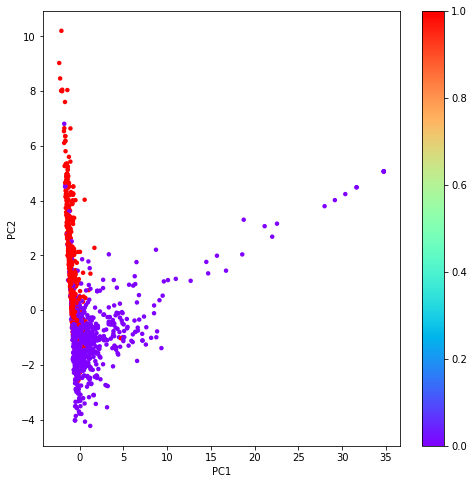

In [16]:
print("Case 2")
pcaknn(2)

In [116]:
#Case 3
from sklearn.feature_selection import f_classif
import heapq, operator

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.5)

def knnknn(n_component):   
    selector = SelectKBest(f_classif, k=5)
    selector.fit(x_train, y_train.ravel())
    scores = selector.pvalues_
    biggest_indices = sorted(range(len(scores)), key=lambda i: float(scores[i]), reverse=True)[:n_component]
    x_train_reduced_by_k = x_train[:, biggest_indices]

    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(x_train_reduced_by_k[:, :], y_train.ravel())

    predict_labels = knn.predict(x_test[:, biggest_indices])
    print(confusion_matrix(y_test, predict_labels))  
    print(classification_report(y_test, predict_labels)) 
    print("Accuracy: ", accuracy_score(y_test, predict_labels))

    plt.figure(figsize = (8,8))
    plt.scatter(x_train_reduced_by_k[:,0],x_train_reduced_by_k[:,1], s=20, c = y_train.ravel(), cmap = "rainbow", edgecolor = "None")
    plt.colorbar()
    plt.clim(0,1)

    plt.xlabel("PC1")
    plt.ylabel("PC2")

[[ 373 1033]
 [ 250  644]]
              precision    recall  f1-score   support

           0       0.60      0.27      0.37      1406
           1       0.38      0.72      0.50       894

   micro avg       0.44      0.44      0.44      2300
   macro avg       0.49      0.49      0.43      2300
weighted avg       0.52      0.44      0.42      2300

Accuracy:  0.44217391304347825


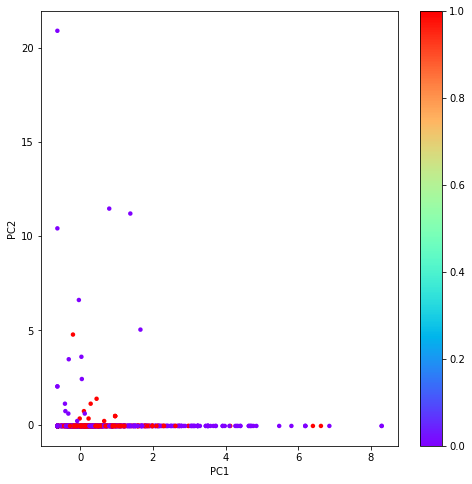

In [130]:
knnknn(2)